### Derin Gezgin

## COM110 Lab6: Visualizing Time Series Data
### glob, datetime, matplotlib and numpy
<img src="https://s.yimg.com/uu/api/res/1.2/ye748JHtfX.ltW4Or9DeRA--~B/aD0zOTIxO3c9Njk2MzthcHBpZD15dGFjaHlvbg--/https://s.yimg.com/os/creatr-uploaded-images/2023-07/84f4bbc0-264e-11ee-876d-4430f96f870a" width="600">
(c) 2023 Timothy Becker, Department of Computer Science <br><br>
<img src="https://www.conncoll.edu/media/website-media/visualidentity/images/1Line-LogoSig-Color.jpg" width="200">

### Preface
Tabular data is a very commonly encoutered type of input data, where each row represents one data element. Each row may have one or more columns associated with it and in tabular form it is common to have a value for each of those columns for every row. For this lab we will work with data that follows these rules where each row will be seperated by a newline character '\n' and in side each row every column will be seperated by a comma ','. This is the CSV dat format that is often used except in cases where there is a lot of text in which case the tab seperated (TSV) is more common. For this LAB you will find multiple CSV files that should be all downloaded. Make a new folder using the left side tool (file browser in jupyter lab) and call it stocks. Next move all of the CSV files into that folder and this lab will involve automating the visualization of these files.

### [Part 1 20 pts] 
We will use a few helper libraries for this lab since visualizing data is intensive. First will be the glob library which allows the programmer to make use of the file system. We will use glob to construct something like a search which will provide us a list of file paths. When we then use a loop to go through each of these file paths we can process one of the stock CSV files at a time.

In [1]:
import glob
glob.glob('stocks/*.csv') #check to make sure you have the files by reruning this code!

['stocks/F.csv',
 'stocks/APLS.csv',
 'stocks/AMZN.csv',
 'stocks/TSLA.csv',
 'stocks/GOOG.csv',
 'stocks/HMC.csv']

If you downloaded the files and set everything up correctly you should see a list of six stocks. You can look up these symbols to find out which companies are here by using [yahoo finance](https://finance.yahoo.com/)

Now the next issue will be dealing with a very difficult type of data we have not yet discussed: time. It turns out dates and time are really hard to work with because they have many representations...

In [2]:
from datetime import datetime

#read in a string date and parse (translate the string into an Object form)

s = '2023/10/1' #date string that is supposed to encode Sunday October 1st, 2023
d = datetime.strptime(s,'%Y/%m/%d') #parse the string using a pattern-> %Y is saying 4-digit year, %m is 2-digit month
d #now we can see the internal datetime object form. It can do math on time and spit out any version...

datetime.datetime(2023, 10, 1, 0, 0)

In [3]:
s1 = '2023/10/01 11:04am' #first time point
s2 = '2023/10/01 09:51pm' #second time point
d1 = datetime.strptime(s1,'%Y/%m/%d %I:%M%p')
d2 = datetime.strptime(s2,'%Y/%m/%d %I:%M%p')
d1,d2

(datetime.datetime(2023, 10, 1, 11, 4), datetime.datetime(2023, 10, 1, 21, 51))

Here we used the documentation for datetime objects [here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior) to figure out what special pattern to use to match s1 and s2. We can then do some maths on time.

In [4]:
delta = d2-d1 #can do time maths...
delta.total_seconds()/(60*60) #convert to hours

10.783333333333333

You can also reformat your time answers

In [5]:
print(s1)
print(d1)
datetime.strftime(d1,'%a %d|%m|%y') #custome date output, it knows that 10/1/23 was a sunday!

2023/10/01 11:04am
2023-10-01 11:04:00


'Sun 01|10|23'

#### [Exercise 1a] 
Given the following time string s, make a datetime object tha reads it in (need to make the correct pattern). 

In [6]:
s = '2020-01-02' #this is Jan 2nd, 2020
#your code here to covert it!
s = datetime.strptime(s, '%Y-%m-%d') # Creating a datetime object and saving it to the same variable

#### [Exercise 1b]
Now use strftime method to covert it to look like: DayOftheWeek Month/Day/Year

In [7]:
#your code here
datetime.strftime(s, '%a %m/%d/%Y') # Formatting the datetime object

'Thu 01/02/2020'

### [Part 2 20pts]
#### [Exercise 2a]
Now you will need to finish the get_date funtion below, it should apply the correct pattern that is in this CSV data which is: 4-digit year, 2-digit month, 2-digit day with the '-' inbetween them. If it works correctly, you will have two new structures to hold your data in RAM called dates and prices. Dates will hold all of the days for a given stock, and prices will have the open,close,high,low and other prices that were recorded that day for that stock SCV file.

In [8]:
import glob
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

def get_date(s):
    s = datetime.strptime(s, '%Y-%m-%d') # Creating a datetime object.
    return s #your code should go here...

def read_stock(path):
    with open(path,'r') as f: 
        raw    = [row.replace('\n','').split(',') for row in f.readlines()]
        header = raw[0]
        dates,prices   = [],[]
        for row in raw[1:]:
            dates  += [get_date(row[0])]            #same as: data.append(get_date(row[0]))
            prices += [[float(x) for x in row[1:]]] #converts the: open,high,low,close,adjclose,volume column values
    return np.asarray(dates),np.asarray(prices)

dates,prices = read_stock(glob.glob('stocks/*.csv')[0])
dates[1:10],prices[1:10,0]

(array([datetime.datetime(2018, 10, 5, 0, 0),
        datetime.datetime(2018, 10, 8, 0, 0),
        datetime.datetime(2018, 10, 9, 0, 0),
        datetime.datetime(2018, 10, 10, 0, 0),
        datetime.datetime(2018, 10, 11, 0, 0),
        datetime.datetime(2018, 10, 12, 0, 0),
        datetime.datetime(2018, 10, 15, 0, 0),
        datetime.datetime(2018, 10, 16, 0, 0),
        datetime.datetime(2018, 10, 17, 0, 0)], dtype=object),
 array([9.15, 9.1 , 9.23, 8.95, 8.82, 8.95, 8.67, 8.87, 8.8 ]))

#### [Exercise 2b]
If this is working and you have the actual dates inside of empty strings above, you can now automate the process of reading every stock using a loop. See how the glob function will give you a list of stocks, write a for loop and load the data from each one

In [9]:
stocks = glob.glob('stocks/*.csv')
stocks

['stocks/F.csv',
 'stocks/APLS.csv',
 'stocks/AMZN.csv',
 'stocks/TSLA.csv',
 'stocks/GOOG.csv',
 'stocks/HMC.csv']

In [10]:
for stock in stocks:
    print(stock)

stocks/F.csv
stocks/APLS.csv
stocks/AMZN.csv
stocks/TSLA.csv
stocks/GOOG.csv
stocks/HMC.csv


In [11]:
#your code here now use the read_stock on each of these...
for stock in stocks:
    dates,prices = read_stock(stock) # Using the read_stock function to read every stock file
    print(dates[1:10],prices[1:10,0]) # Printing to check if successful

[datetime.datetime(2018, 10, 5, 0, 0) datetime.datetime(2018, 10, 8, 0, 0)
 datetime.datetime(2018, 10, 9, 0, 0)
 datetime.datetime(2018, 10, 10, 0, 0)
 datetime.datetime(2018, 10, 11, 0, 0)
 datetime.datetime(2018, 10, 12, 0, 0)
 datetime.datetime(2018, 10, 15, 0, 0)
 datetime.datetime(2018, 10, 16, 0, 0)
 datetime.datetime(2018, 10, 17, 0, 0)] [9.15 9.1  9.23 8.95 8.82 8.95 8.67 8.87 8.8 ]
[datetime.datetime(2018, 10, 5, 0, 0) datetime.datetime(2018, 10, 8, 0, 0)
 datetime.datetime(2018, 10, 9, 0, 0)
 datetime.datetime(2018, 10, 10, 0, 0)
 datetime.datetime(2018, 10, 11, 0, 0)
 datetime.datetime(2018, 10, 12, 0, 0)
 datetime.datetime(2018, 10, 15, 0, 0)
 datetime.datetime(2018, 10, 16, 0, 0)
 datetime.datetime(2018, 10, 17, 0, 0)] [16.4      15.87     15.78     15.82     14.83     15.71     15.77
 15.69     16.610001]
[datetime.datetime(2018, 10, 5, 0, 0) datetime.datetime(2018, 10, 8, 0, 0)
 datetime.datetime(2018, 10, 9, 0, 0)
 datetime.datetime(2018, 10, 10, 0, 0)
 datetime.dateti

### [Part 3 20pts]
Now we will learn some plotting basics. First we can set the overall plot size with rcParams:

In [12]:
#grab one of the stocks
stock = stocks[0]
stock #should be Ford Motor Car
dates,prices = read_stock(stock)

An inportant function here is the plot which is taking: (x,y,label=?)

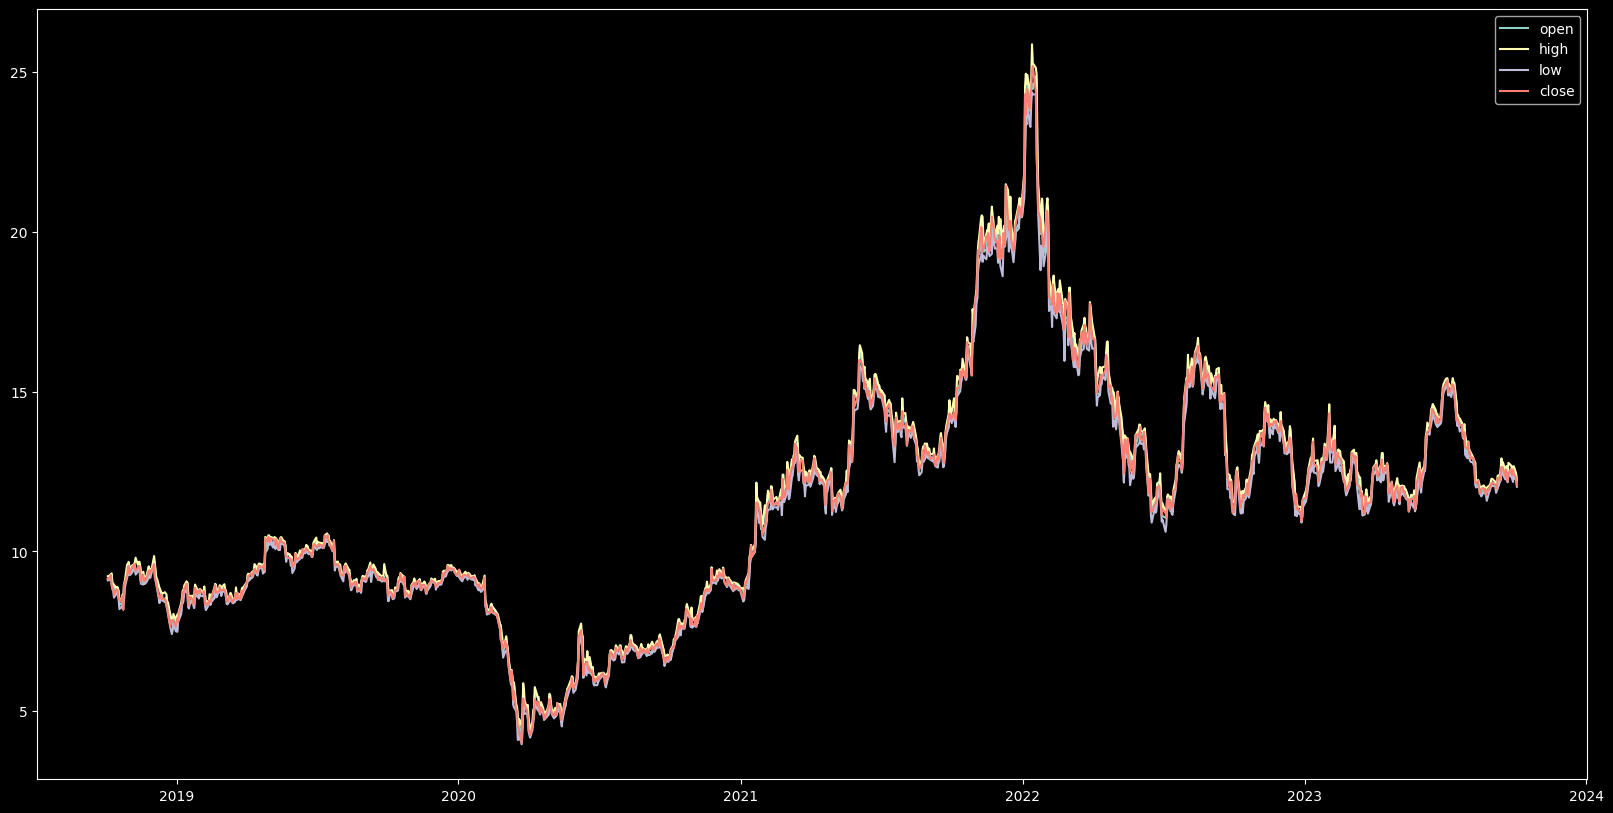

In [13]:
plt.rcParams["figure.figsize"] = (20,10) #sets the size
plt.style.use('dark_background')         #dark background, comment this out to change back to white
fig, ax = plt.subplots()                 #establishes figure and axis
ax.plot(dates,prices[:,0],label="open")  #plots the first column (index 0)
ax.plot(dates,prices[:,1],label="high")  #plots the first column (index 1)
ax.plot(dates,prices[:,2],label="low")   #plots the first column (index 2)
ax.plot(dates,prices[:,3],label="close") #plots the first column (index 3)
ax.legend()                              #automatically add a legend!
plt.show()                               #show is needed to see it...

#### [Exercise 3a]
Rewrite the above plot code to be a function. In other words you need to write a function that takes in the x, y and label paramters and will generate a new plot.

In [14]:
#your code here
def plotter(stock): # Defining the function
    dates,prices = read_stock(stock)
    plt.rcParams["figure.figsize"] = (20,10) #sets the size
    plt.style.use('dark_background')         #dark background, comment this out to change back to white
    fig, ax = plt.subplots()                 #establishes figure and axis
    ax.plot(dates,prices[:,0],label="open")  #plots the first column (index 0)
    ax.plot(dates,prices[:,1],label="high")  #plots the first column (index 1)
    ax.plot(dates,prices[:,2],label="low")   #plots the first column (index 2)
    ax.plot(dates,prices[:,3],label="close") #plots the first column (index 3)
    ax.legend()                              #automatically add a legend!
    plt.show()                               #show is needed to see it...

#### [Exercise 3b]
Now loop through stocks and plot them all!

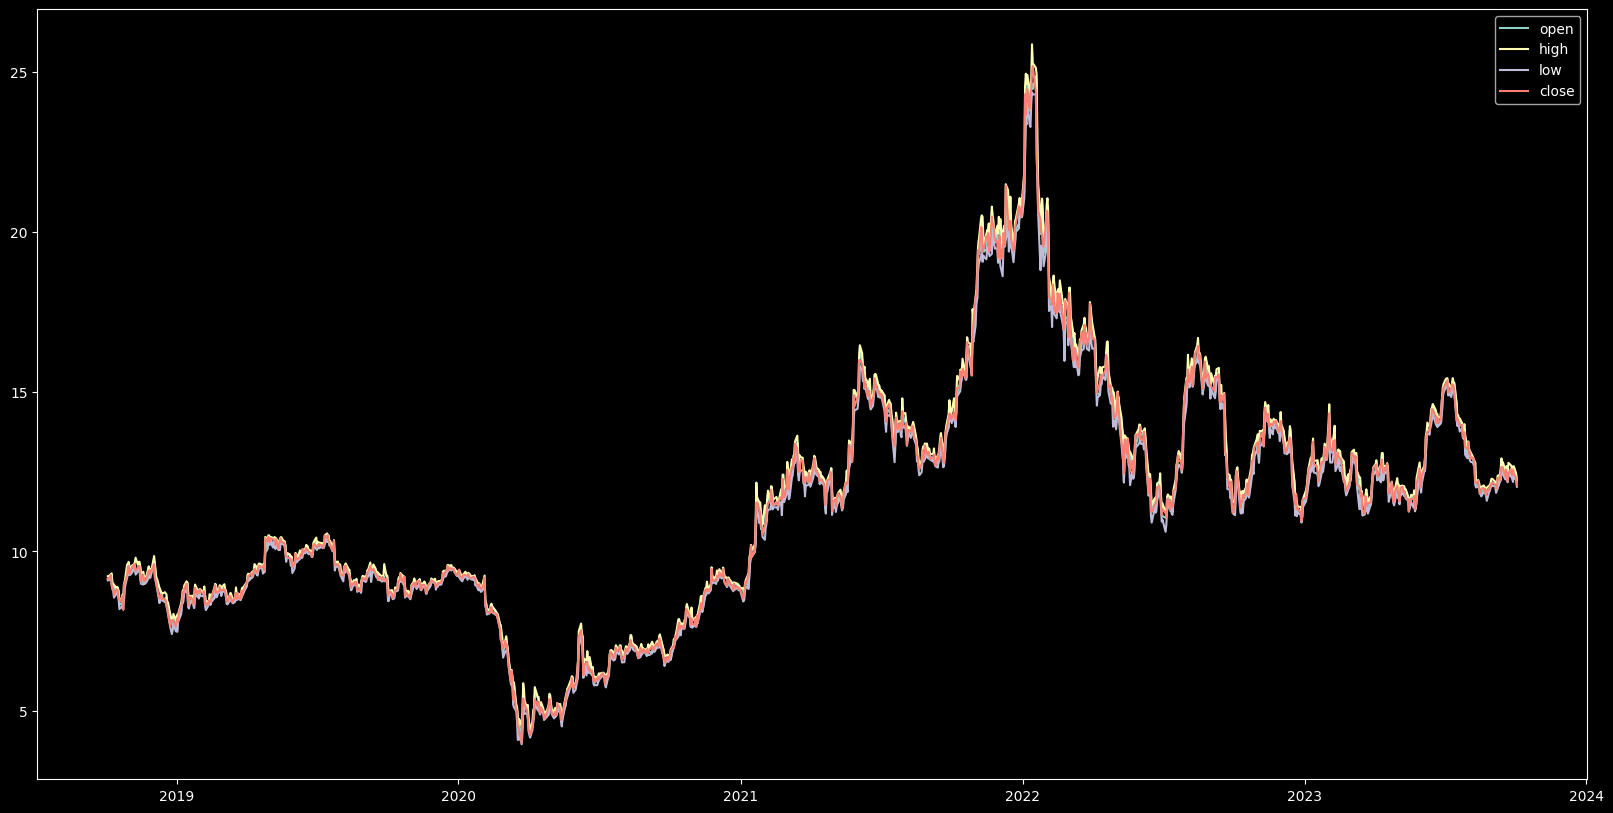

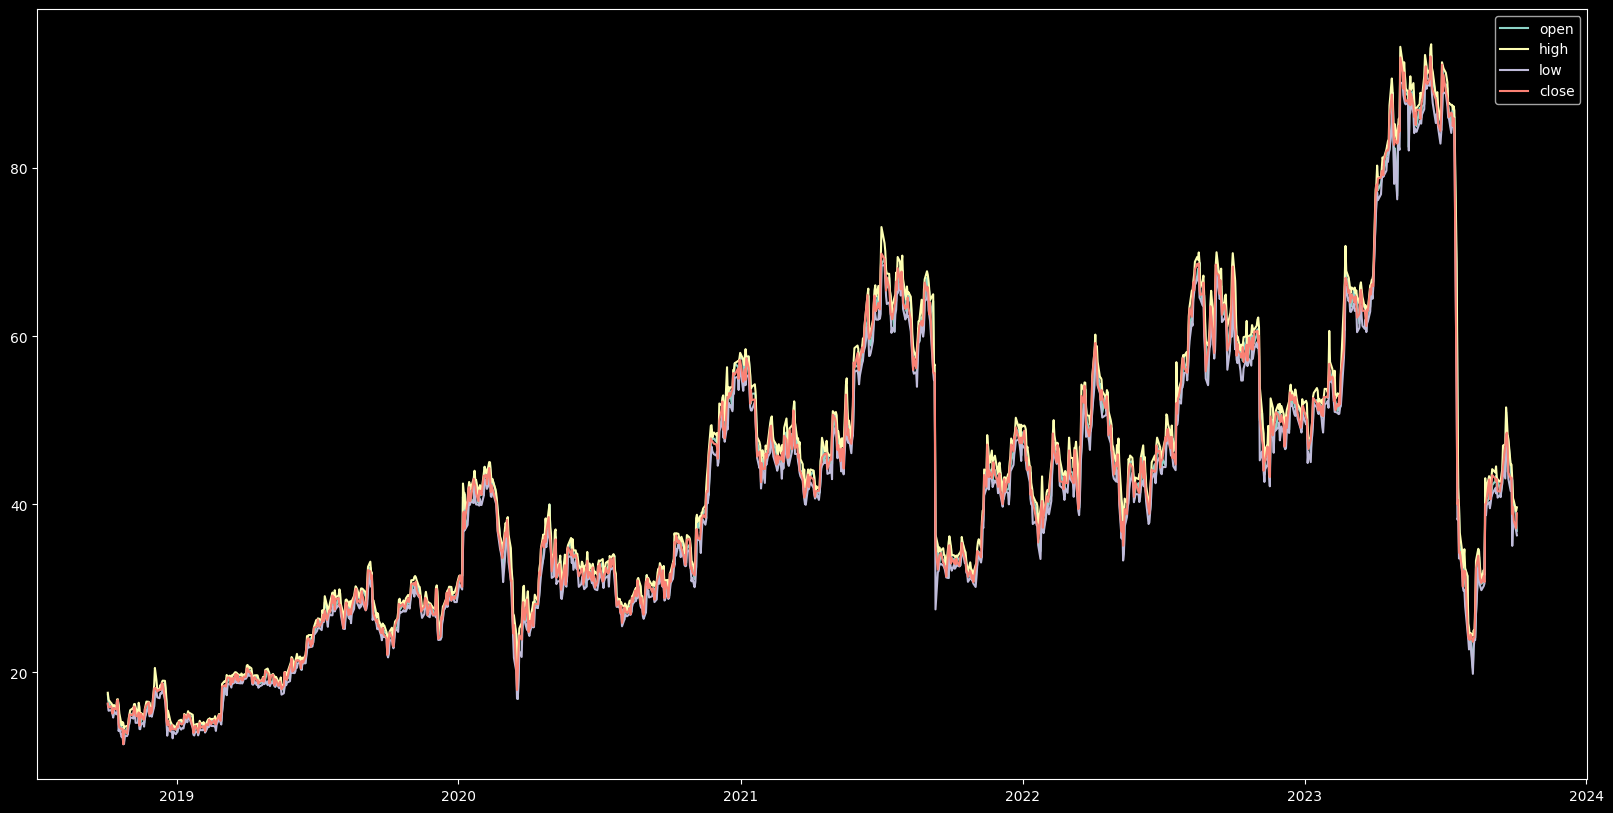

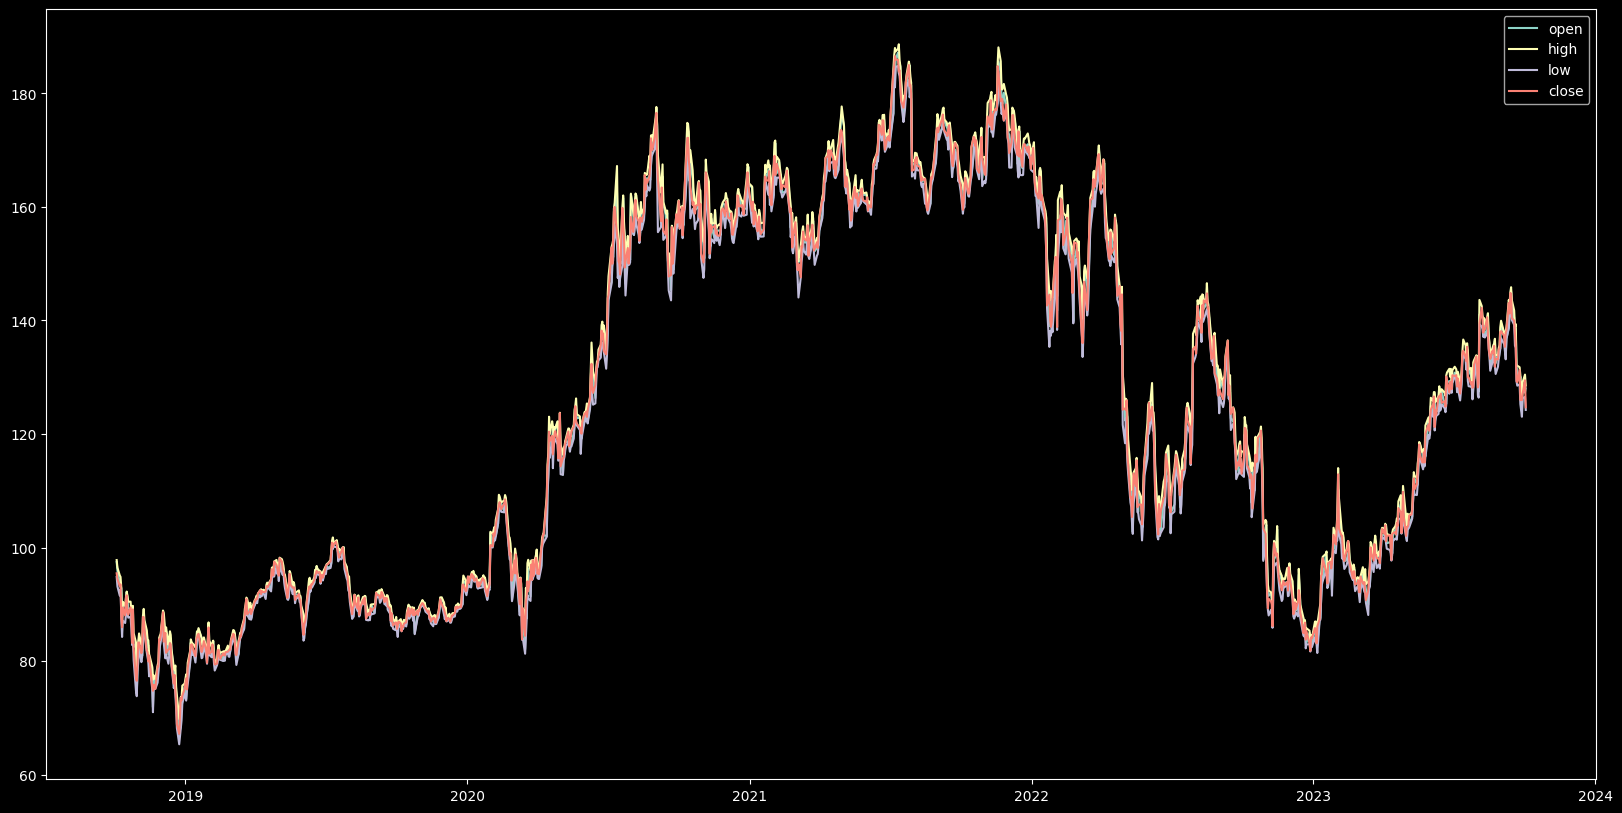

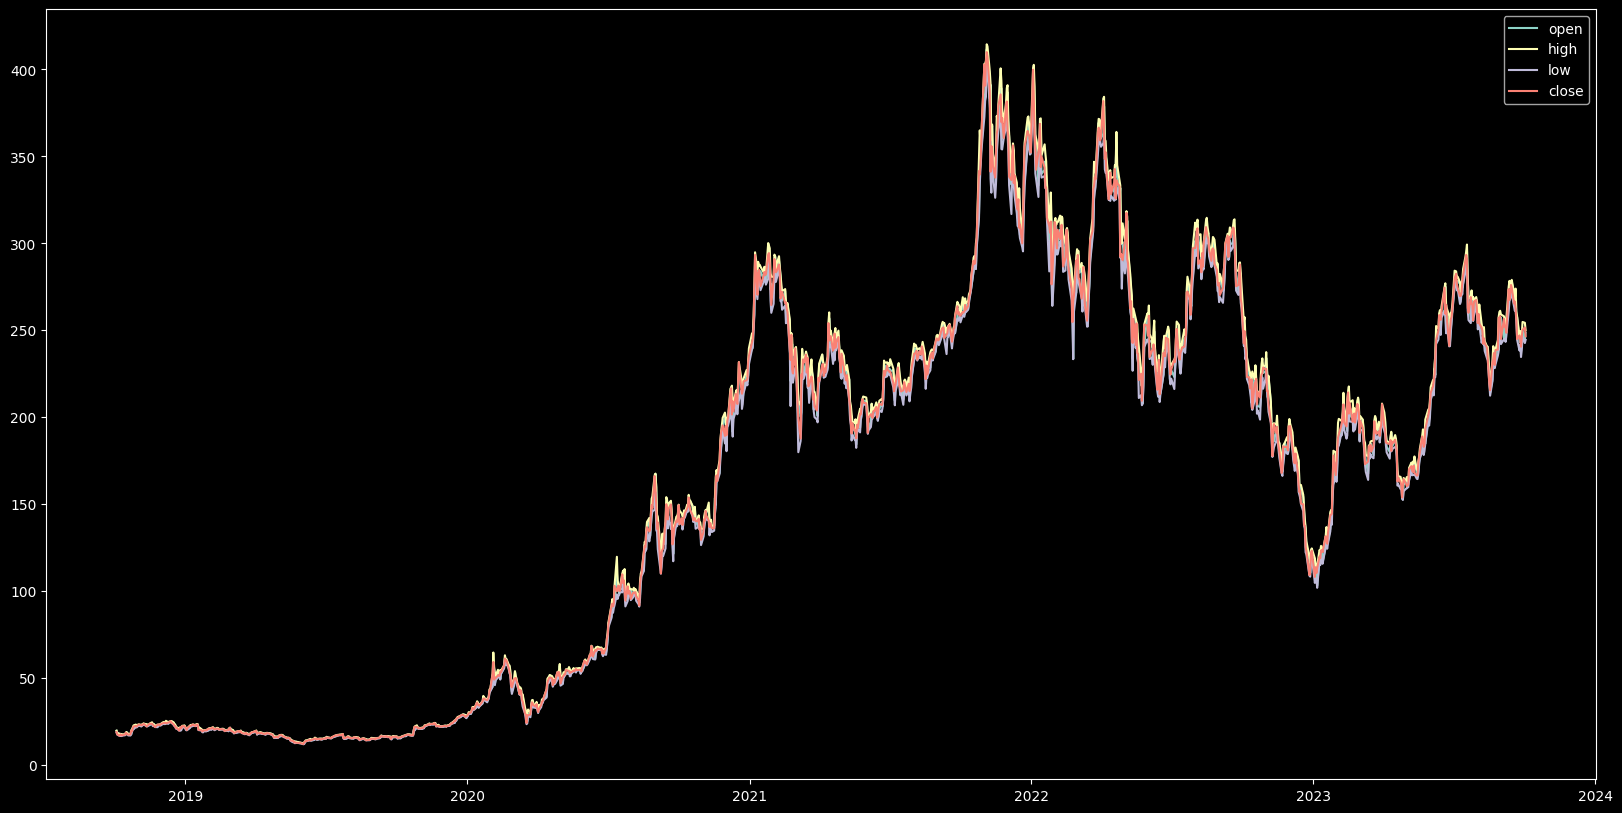

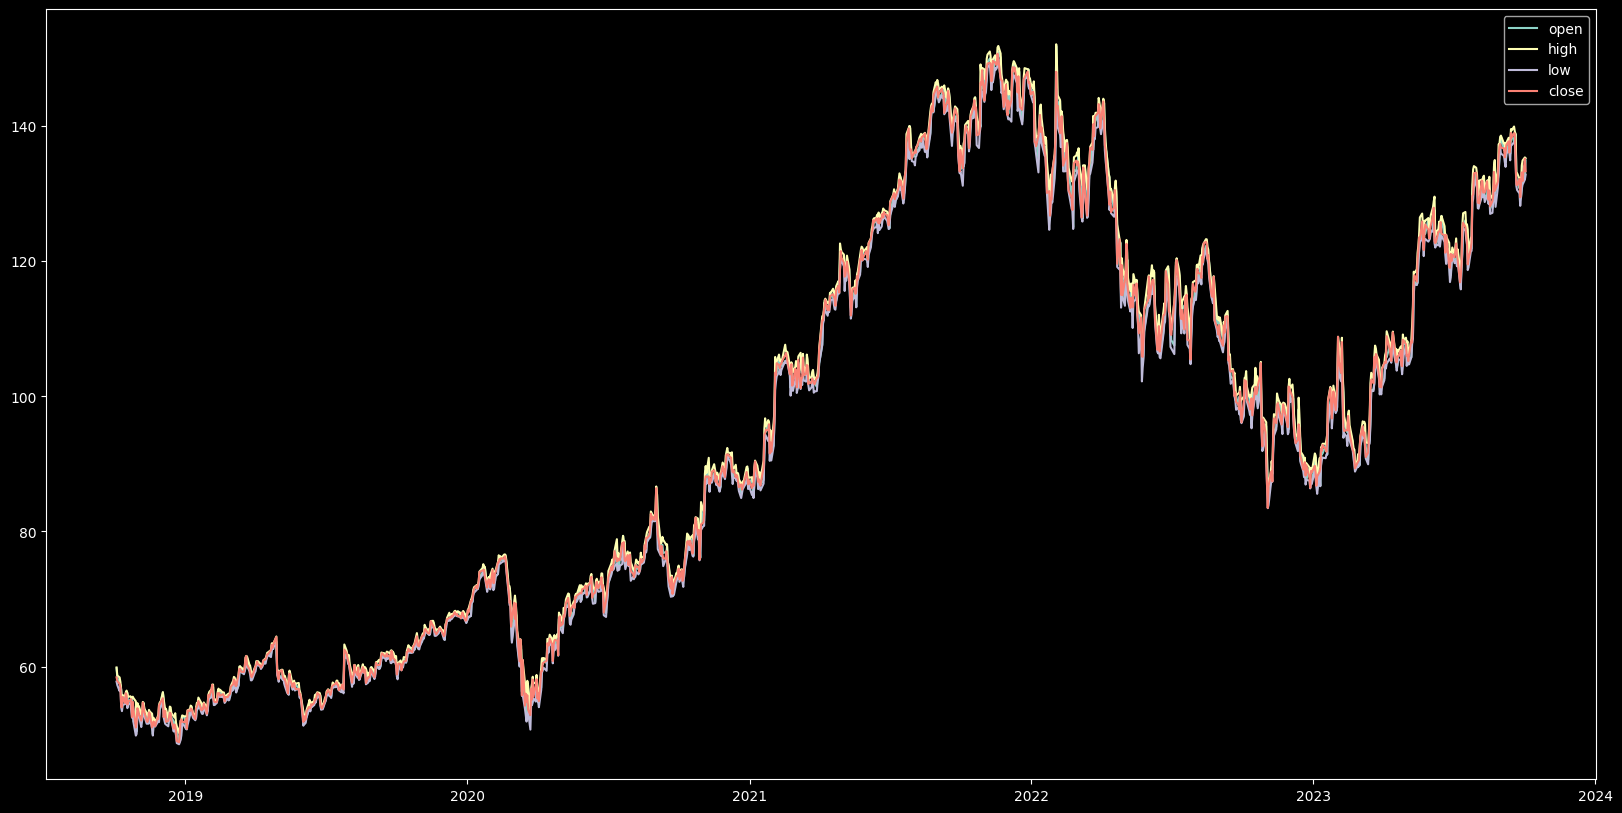

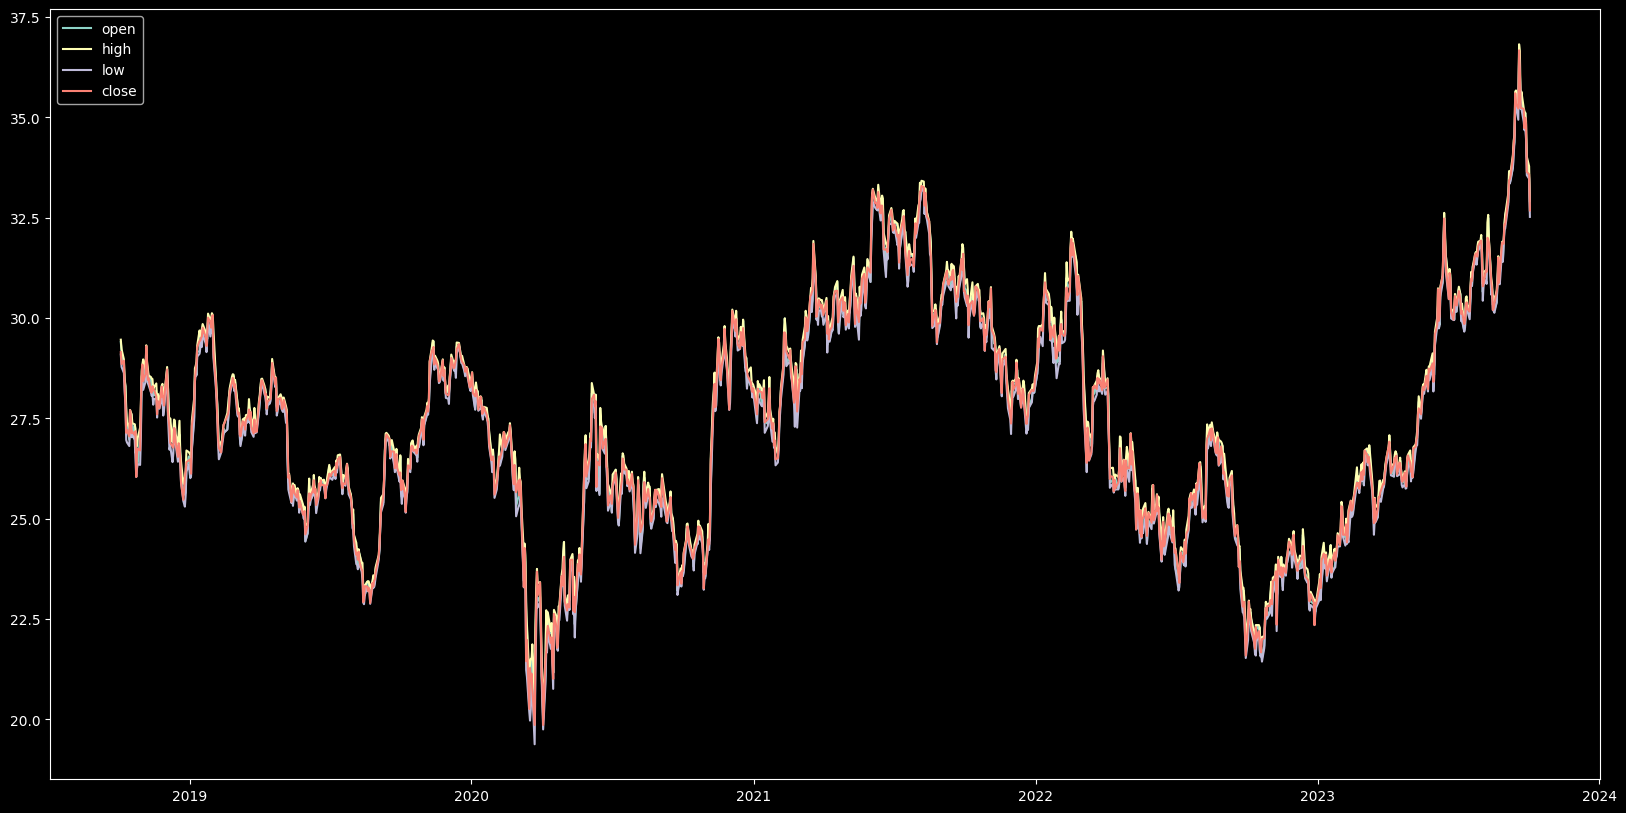

In [15]:
#your code here
for stock in stocks: # Iterating through every stock file
    plotter(stock) # Using the function on the file

### [Part 4 20pts]
Size plots is not as good as one, now we will make a multi-line plot that uses all the data. We will create one structure to hold the dates, and a second structure to hold one column from each stock (instead of open,close, etc...)

In [16]:
def read_stocks(stock_folder):
    D,P = [],[] #a list of all the dates and another for prices
    for stock in glob.glob('stocks/*.csv'):
        print('working on stock=%s'%stock)
        dates,prices = read_stock(stock)       #call your function that converts the strings
        prices = prices[:,0]                   #pull of open which is column index 0
        D += [dates]                           #pack up this stock dates
        P += [prices]                          #pack up this stock prices
    return D,P

D,P    = read_stocks('stock/')  #call the above super fucntion!
dates  = D[0]                   #all the dates happen to be the same... since yahoo finance was searched for a 5YR
prices = np.asarray(P).T        #grab all the opening prices and transpose them for ploting

working on stock=stocks/F.csv
working on stock=stocks/APLS.csv
working on stock=stocks/AMZN.csv
working on stock=stocks/TSLA.csv
working on stock=stocks/GOOG.csv
working on stock=stocks/HMC.csv


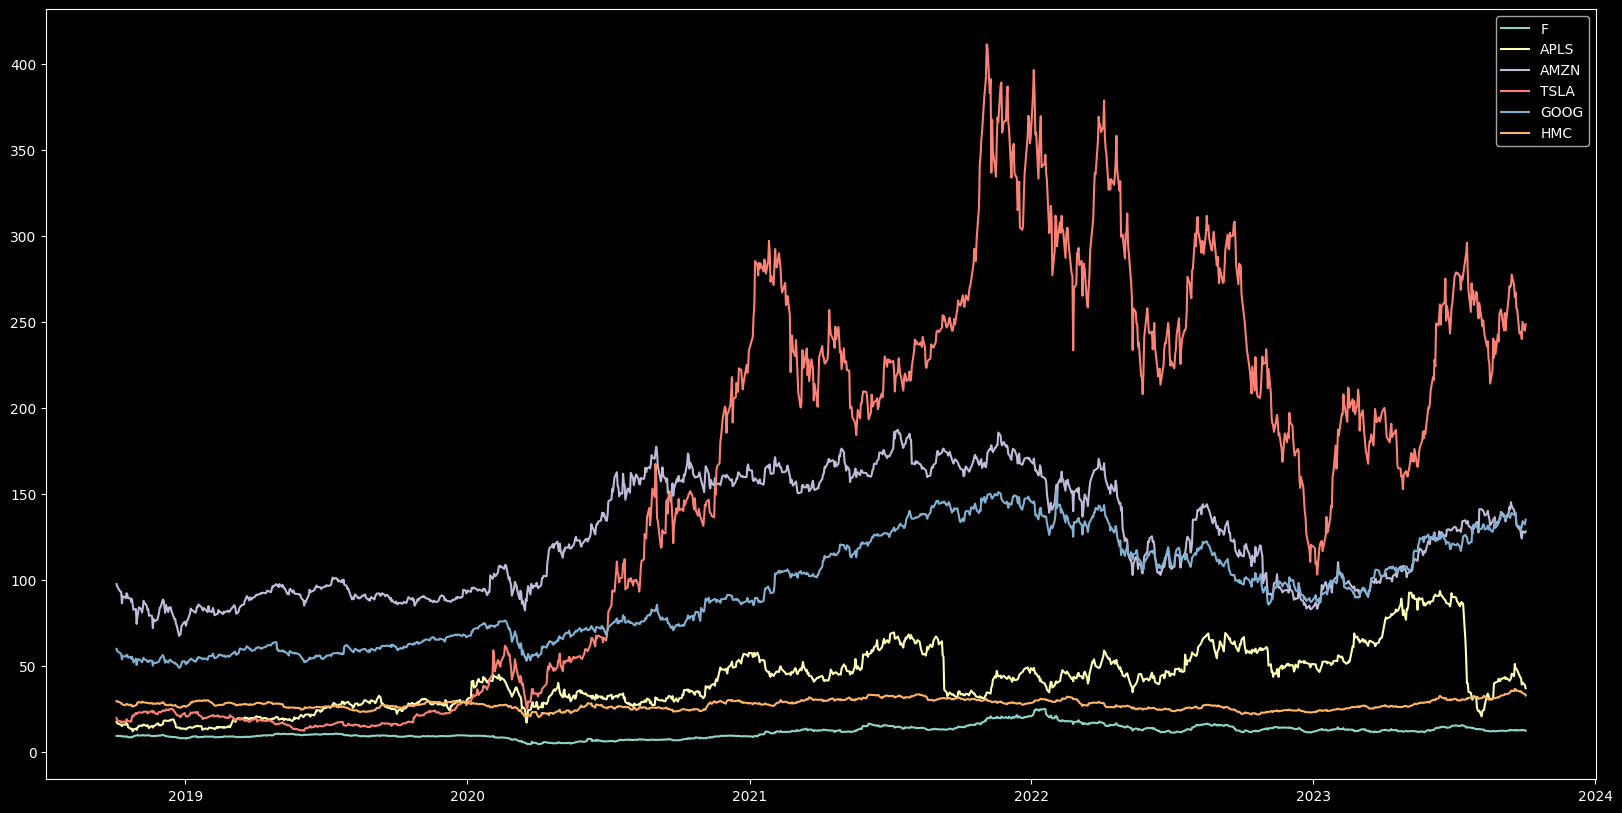

In [17]:
plt.rcParams["figure.figsize"] = (20,10) #sets the size
plt.style.use('dark_background')
fig, ax = plt.subplots()                 #establishes figure and axis
ax.plot(dates,prices[:,0],label="F")     #plots the first column (index 0)
ax.plot(dates,prices[:,1],label="APLS")  #plots the first column (index 1)
ax.plot(dates,prices[:,2],label="AMZN")  #plots the first column (index 2)
ax.plot(dates,prices[:,3],label="TSLA")  #plots the first column (index 3)
ax.plot(dates,prices[:,4],label="GOOG")  #plots the first column (index 3)
ax.plot(dates,prices[:,5],label="HMC")   #plots the first column (index 3)
ax.legend()                              #automatically add a legend!
plt.show()

## [5 20 pts] Your thoughts on the lab!
If you are seeing a bunch of stocks as a time series (and not the solid line that was here) you have completed the lab. Was this one more or less difficult than the last? Did you enjoy working with time series? Did you like using the plotting system?

I think that this lab was more straightforward than the previous ones. It was easier to complete and work on.

I had a lot of fun while working with time series data. It has many real world applications especially in finance and day-trading. I think that working with time series data is a huge ocean and this lab was a single water drop from that ocean. Time series data has a lot of potential.

I enjoyed using the matplotlib library and visualizing data. I think that visualization is a very important aspect of the programming which helps us to understand the data.  